# Full simulations of mean vs fluctuation-driven multistability

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

In [2]:
from ntwk import SoftmaxNtwk

## Mean-driven multistable network

In [3]:
N = 3000

In [4]:
D = 16
mself = np.eye(D, dtype=bool)

MU_J_SELF = 3
MU_J_CROSS = 0
SGM_J_SELF = 1
SGM_J_CROSS = 1

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
x_0[:, 4] *= 1.2
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=100, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

....

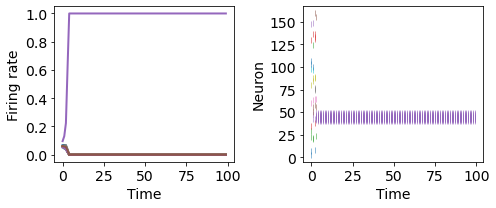

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=2)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=14)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=14)

fig.savefig('figs/main/3_multi_mean_full.svg')

## Fluctuation-driven multistable network

In [6]:
D = 16
mself = np.eye(D, dtype=bool)

MU_J_SELF = 0
MU_J_CROSS = 0
SGM_J_SELF = 13
SGM_J_CROSS = 1

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS

J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

x_0 = np.random.randn(N, D)
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=100, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

....

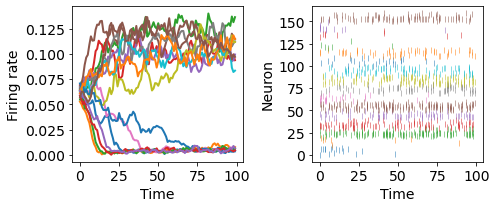

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=2)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=14)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=14)

fig.savefig('figs/main/3_multi_fluc_full.svg')

Second initialization

....

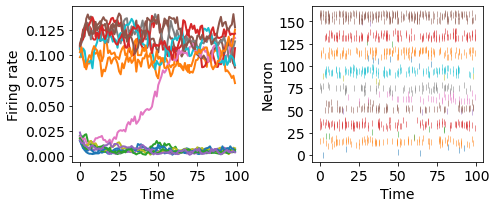

In [8]:
x_0 = np.random.randn(N, D)
x_0[:, np.arange(1, D, 2)] *= 2
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=100, x_0=x_0, progress=20)

ths = ys.mean(axis=1)

fig, axs = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

# activations
axs[0].plot(ths, lw=2)

nplot_cotuned = 10

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)
    
set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=14)
set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=14)

fig.savefig('figs/main/3_multi_fluc_full_2.svg')